# **An√°lisis de Tarjetas de Cr√©dito: PCA y K-Means**
**By: Diego Araujo**
## Introducci√≥n:
En este proyecto, aplicamos **An√°lisis de Componentes Principales (PCA)** y **Segmentaci√≥n con K-Means** a una base de datos de clientes con tarjetas de cr√©dito.  
El objetivo es comprender los patrones de uso y segmentar clientes en grupos con caracter√≠sticas similares, lo que puede ser √∫til para la gesti√≥n del riesgo financiero y la personalizaci√≥n de servicios.

## Objetivos:
1. **Preprocesamiento de datos:** Limpieza y normalizaci√≥n de las variables.
2. **Reducci√≥n de dimensionalidad con PCA:** Identificar las variables m√°s relevantes y visualizar la distribuci√≥n de los datos.
3. **Segmentaci√≥n con K-Means:** Aplicar el m√©todo del codo para determinar el n√∫mero √≥ptimo de clusters y segmentar clientes en grupos homog√©neos.
4. **Interpretaci√≥n de resultados:** Analizar los segmentos obtenidos y sus caracter√≠sticas clave.

## Variables :
- **balance:** Saldo promedio en la tarjeta.
- **frecuencia.balance:** Frecuencia de uso del saldo.
- **compras:** Monto total de compras realizadas.
- **deunavez.maxima:** Compra m√°s grande realizada de una sola vez.
- **importe.plazos:** Total de compras realizadas a plazos.
- **adelanto.efectivo:** Adelantos de efectivo retirados.
- **frecuencia.compra:** Frecuencia de compras realizadas.
- **deunavez.frecuentes:** Frecuencia de compras grandes.
- **plazos.frecuentes:** Frecuencia de compras a plazos.
- **efectivo.frecuentes:** Frecuencia de adelantos en efectivo.
- **transacciones.adelanto:** N√∫mero de transacciones de adelantos en efectivo.
- **transacciones.compras:** N√∫mero de transacciones de compras realizadas.
- **limite.credito:** L√≠mite de cr√©dito asignado.
- **monto.pagado:** Monto total pagado por el cliente.
- **pago.minimo:** Pago m√≠nimo realizado por el cliente.
- **pago.total.prct:** Porcentaje del total pagado respecto a la deuda.
- **tenencia:** Indicador de tenencia de tarjeta.

Este an√°lisis busca extraer informaci√≥n clave sobre los clientes para facilitar la toma de decisiones en estrategias de cr√©dito y segmentaci√≥n de clientes.

In [1]:
#Importamos las bibliotecas que usaremos
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
#Importar archivos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargamos nuestra Data
ruta_csv = "/content/drive/MyDrive/Codigos Python colab/tarjetacredito (1).csv"
df = pd.read_csv(ruta_csv,sep=';', index_col='ID')
df.head()

balance  frecuencia.balance  compras  deunavez.maxima  \
ID                                                                  
C10001    40.900749            0.818182    95.40             0.00   
C10002  3202.467416            0.909091     0.00             0.00   
C10003  2495.148862            1.000000   773.17           773.17   
C10004  1666.670542            0.636364  1499.00          1499.00   
C10005   817.714335            1.000000    16.00            16.00   

        importe.plazos  adelanto.efectivo  frecuencia.compra  \
ID                                                             
C10001            95.4           0.000000           0.166667   
C10002             0.0        6442.945483           0.000000   
C10003             0.0           0.000000           1.000000   
C10004             0.0         205.788017           0.083333   
C10005             0.0           0.000000           0.083333   

        deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  \
ID                                                                    
C10001             0.000000           0.083333             0.000000   
C10002             0.000000           0.000000             0.250000   
C10003             1.000000           0.000000             0.000000   
C10004             0.083333           0.000000             0.083333   
C10005             0.083333           0.000000             0.000000   

        transacciones.adelanto  transacciones.compras  limite.credito  \
ID                                                                      
C10001                       0                      2          1000.0   
C10002                       4                      0          7000.0   
C10003                       0                     12          7500.0   
C10004                       1                      1          7500.0   
C10005                       0                      1          1200.0   

        monto.pagado  pago.minimo  pago.total.prct  tenencia  
ID                                                            
C10001    201.802084   139.509787         0.000000        12  
C10002   4103.032597  1072.340217         0.222222        12  
C10003    622.066742   627.284787         0.000000        12  
C10004      0.000000     0.000000         0.000000        12  
C10005    678.334763   244.791237         0.000000        12

In [3]:
df.describe()

balance  frecuencia.balance       compras  deunavez.maxima  \
count   8950.000000         8950.000000   8950.000000      8950.000000   
mean    1564.474828            0.877271   1003.204834       592.437371   
std     2081.531879            0.236904   2136.634782      1659.887917   
min        0.000000            0.000000      0.000000         0.000000   
25%      128.281915            0.888889     39.635000         0.000000   
50%      873.385231            1.000000    361.280000        38.000000   
75%     2054.140036            1.000000   1110.130000       577.405000   
max    19043.138560            1.000000  49039.570000     40761.250000   

       importe.plazos  adelanto.efectivo  frecuencia.compra  \
count     8950.000000        8950.000000        8950.000000   
mean       411.067645         978.871112           0.490351   
std        904.338115        2097.163877           0.401371   
min          0.000000           0.000000           0.000000   
25%          0.000000           0.000000           0.083333   
50%         89.000000           0.000000           0.500000   
75%        468.637500        1113.821139           0.916667   
max      22500.000000       47137.211760           1.000000   

       deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  \
count          8950.000000        8950.000000          8950.000000   
mean              0.202458           0.364437             0.135144   
std               0.298336           0.397448             0.200121   
min               0.000000           0.000000             0.000000   
25%               0.000000           0.000000             0.000000   
50%               0.083333           0.166667             0.000000   
75%               0.300000           0.750000             0.222222   
max               1.000000           1.000000             1.500000   

       transacciones.adelanto  transacciones.compras  limite.credito  \
count             8950.000000            8950.000000     8950.000000   
mean                 3.248827              14.709832     4493.947277   
std                  6.824647              24.857649     3638.922543   
min                  0.000000               0.000000        0.000000   
25%                  0.000000               1.000000     1600.000000   
50%                  0.000000               7.000000     3000.000000   
75%                  4.000000              17.000000     6500.000000   
max                123.000000             358.000000    30000.000000   

       monto.pagado   pago.minimo  pago.total.prct     tenencia  
count   8950.000000   8950.000000      8950.000000  8950.000000  
mean    1733.143852    833.983453         0.153715    11.517318  
std     2895.063757   2335.989918         0.292499     1.338331  
min        0.000000      0.000000         0.000000     6.000000  
25%      383.276166    163.028164         0.000000    12.000000  
50%      856.901546    289.628402         0.000000    12.000000  
75%     1901.134317    788.713501         0.142857    12.000000  
max    50721.483360  76406.207520         1.000000    12.000000

# Aplicaci√≥n de PCA: Reducci√≥n de Dimensionalidad

## ¬øPor qu√© usamos PCA?
En este proyecto, contamos con m√∫ltiples variables financieras relacionadas con el uso de tarjetas de cr√©dito. Muchas de estas variables pueden estar correlacionadas entre s√≠, lo que genera redundancia y dificulta la visualizaci√≥n e interpretaci√≥n de los datos.  
Para abordar este problema, aplicamos **An√°lisis de Componentes Principales (PCA)**, que nos permite:

1. **Reducir la dimensionalidad** del conjunto de datos sin perder demasiada informaci√≥n.
2. **Identificar patrones** subyacentes y relaciones entre variables.
3. **Eliminar colinealidad** entre las variables, mejorando el rendimiento de algoritmos como K-Means.
4. **Facilitar la visualizaci√≥n** de los datos en dos o tres dimensiones.

## ¬øC√≥mo funciona?
PCA transforma las variables originales en un nuevo conjunto de variables llamadas **componentes principales**.  
Cada componente es una combinaci√≥n lineal de las variables originales y captura la m√°xima variabilidad posible en los datos.

## Proceso aplicado:
1. **Estandarizaci√≥n** de los datos para que todas las variables tengan la misma escala.
2. **C√°lculo de los componentes principales**, extrayendo aquellos que explican la mayor parte de la varianza.
3. **Selecci√≥n del n√∫mero √≥ptimo de componentes**, basado en la varianza explicada (regla de la varianza acumulada o gr√°fico de codo).
4. **Transformaci√≥n de los datos originales** a la nueva representaci√≥n con menos dimensiones.

Al final, utilizamos estos nuevos componentes como entrada para la segmentaci√≥n con **K-Means**, permitiendo una clasificaci√≥n m√°s eficiente y significativa de los clientes.


In [4]:
# Creamos u ajustamos los datos con PCA
pca = PCA()
pca.fit(df)

PCA()

# An√°lisis de la Varianza Explicada en PCA

## ¬øQu√© es la varianza explicada?
La **varianza explicada** en PCA nos indica cu√°nta informaci√≥n de los datos originales conserva cada componente principal.  
Cuanto mayor sea la varianza explicada por un componente, m√°s representativo ser√° de la estructura de los datos originales.

## ¬øPor qu√© es importante?
Al analizar la varianza explicada, podemos:
1. **Determinar cu√°ntos componentes principales usar**, eligiendo solo aquellos que retienen la mayor parte de la informaci√≥n.
2. **Reducir la dimensionalidad** sin perder informaci√≥n clave.
3. **Evitar el uso de componentes irrelevantes**, mejorando la eficiencia del modelo.

## ¬øC√≥mo lo aplicamos?
1. Calculamos la **varianza explicada acumulada** de los componentes principales.
2. Generamos un **gr√°fico de codo**, observando d√≥nde la varianza deja de aumentar significativamente.
3. Seleccionamos el n√∫mero √≥ptimo de componentes basado en un umbral (ej. **90-95% de la varianza acumulada**).

Este an√°lisis nos permitir√° construir una representaci√≥n compacta de los datos sin perder patrones importantes, facilitando su uso en la segmentaci√≥n con **K-Means**.

In [5]:
# Varianza explicada por cada componente
var_explicada = pca.explained_variance_ratio_
print(var_explicada)

[4.75406724e-01 1.77594588e-01 1.40251001e-01 1.13473244e-01
 4.80539346e-02 2.71636257e-02 1.80488910e-02 6.63735164e-06
 7.19579073e-07 5.87595148e-07 3.83577919e-08 4.18725515e-09
 1.48245288e-09 1.42788056e-09 9.41979867e-10 2.60260303e-10
 1.51614304e-10]


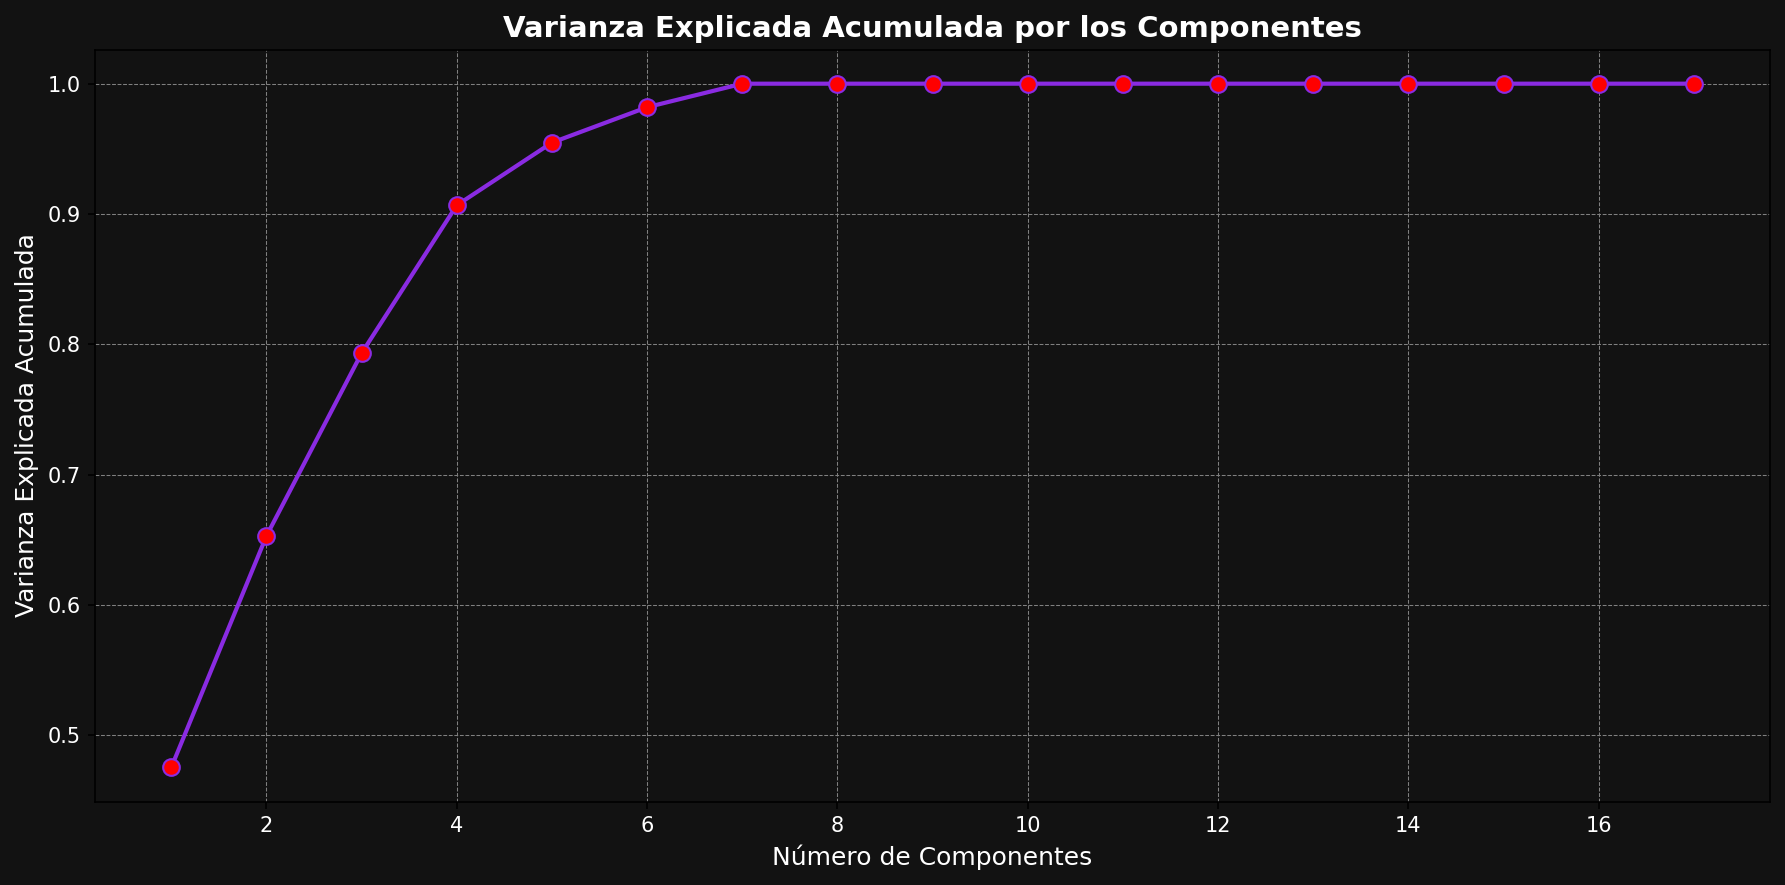

In [6]:
#Visualizacion de la varianza explicada
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(range(1, len(var_explicada) + 1), var_explicada.cumsum(),
         marker="o", linestyle="-", color="#8A2BE2", markerfacecolor="red", markersize=8, linewidth=2)
plt.title("Varianza Explicada Acumulada por los Componentes", fontsize=14, color="white", fontweight="bold")
plt.xlabel("N√∫mero de Componentes", fontsize=12, color="white")
plt.ylabel("Varianza Explicada Acumulada", fontsize=12, color="white")
plt.xticks(fontsize=10, color="white")
plt.yticks(fontsize=10, color="white")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.gca().set_facecolor("#121212")
plt.gcf().set_facecolor("#121212")
plt.show()

üìå **Interpretaci√≥n de la gr√°fica: Selecci√≥n del N√∫mero √ìptimo de Componentes Principales (PCA)**  

Al aplicar **PCA** a nuestros datos, buscamos reducir la cantidad de variables conservando la mayor cantidad de informaci√≥n posible.  
Para esto, analizamos la **varianza explicada acumulada** y encontramos que:  

‚úÖ A partir del **componente 6**, la curva empieza a estabilizarse.  
‚úÖ Los primeros **6 componentes** retienen la mayor parte de la variabilidad en los datos.  
‚úÖ Incluir m√°s componentes solo a√±adir√≠a complejidad sin un beneficio significativo en la informaci√≥n retenida.  

üîπ Por ello, seleccionamos **6 componentes principales**, logrando un equilibrio entre **reducci√≥n de dimensionalidad**  
y **preservaci√≥n de la informaci√≥n clave** del dataset.  

In [7]:
pca6 = PCA(n_components = 6)
pca6.fit(df)

PCA(n_components=6)

üîç **Matriz de Correlaci√≥n entre Variables Originales y Componentes Principales**  

Para entender c√≥mo las variables originales se relacionan con los **Componentes Principales (PCA)**,  
construimos un DataFrame llamado **df_pca6componentes**, el cual contiene las **cargas factoriales**  
de los **6 primeros componentes** obtenidos del an√°lisis de PCA.  

üìä **¬øQu√© representan estas cargas?**  
‚úÖ Indican **cu√°nto influye cada variable original** en cada componente principal.  
‚úÖ Valores altos (positivos o negativos) significan una fuerte relaci√≥n entre la variable y el componente.  
‚úÖ Nos ayudan a interpretar **qu√© caracter√≠sticas predominan en cada componente latente**.  

üîπ En resumen, esta matriz nos permite traducir los **componentes principales**,  
que son combinaciones matem√°ticas de las variables originales, en **factores comprensibles y √∫tiles para el an√°lisis**.  
"""

In [8]:
# Creamos un DataFrame de los componentes
df_pca6componentes = pd.DataFrame(data=pca6.components_,
                                 columns = df.columns.values,
                                 index = ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5", "Componente 6"])

In [9]:
df_pca6componentes

balance  frecuencia.balance   compras  deunavez.maxima  \
Componente 1  0.291744            0.000008  0.292490         0.210648   
Componente 2 -0.300770           -0.000005  0.501524         0.380909   
Componente 3  0.275369            0.000012 -0.096010        -0.077512   
Componente 4  0.054855            0.000010  0.294864         0.186013   
Componente 5  0.719933            0.000043  0.288772         0.279678   
Componente 6 -0.476541           -0.000014  0.269159         0.302693   

              importe.plazos  adelanto.efectivo  frecuencia.compra  \
Componente 1        0.081837           0.216248           0.000013   
Componente 2        0.120654          -0.204715           0.000037   
Componente 3       -0.018525           0.396795          -0.000030   
Componente 4        0.108868          -0.565114           0.000045   
Componente 5        0.009019           0.139372          -0.000005   
Componente 6       -0.033619           0.632894           0.000015   

              deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  \
Componente 1             0.000023           0.000008             0.000010   
Componente 2             0.000028           0.000030            -0.000019   
Componente 3            -0.000028          -0.000017             0.000029   
Componente 4             0.000025           0.000038            -0.000032   
Componente 5             0.000021          -0.000011             0.000034   
Componente 6             0.000032          -0.000007             0.000021   

              transacciones.adelanto  transacciones.compras  limite.credito  \
Componente 1                0.000405               0.002341        0.689597   
Componente 2               -0.000505               0.003520       -0.447094   
Componente 3                0.000991              -0.000956       -0.507108   
Componente 4               -0.001164               0.003093        0.090638   
Componente 5                0.000710               0.002234       -0.230880   
Componente 6                0.001098               0.000970        0.073590   

              monto.pagado  pago.minimo  pago.total.prct  tenencia  
Componente 1      0.487224     0.136254         0.000002  0.000039  
Componente 2      0.470304    -0.188047         0.000026  0.000003  
Componente 3      0.292246     0.639209        -0.000027 -0.000026  
Componente 4     -0.363734     0.635382         0.000001  0.000053  
Componente 5     -0.368635    -0.333735        -0.000057 -0.000067  
Componente 6     -0.426177     0.141806         0.000027 -0.000176

In [10]:
print(pca6.components_)

[[ 2.91743550e-01  8.48057087e-06  2.92490440e-01  2.10648351e-01
   8.18365209e-02  2.16248317e-01  1.29742082e-05  2.27287105e-05
   8.46749643e-06  1.02259170e-05  4.04882716e-04  2.34066340e-03
   6.89596929e-01  4.87223673e-01  1.36254497e-01  2.31648511e-06
   3.94234308e-05]
 [-3.00770499e-01 -4.59880627e-06  5.01523648e-01  3.80909326e-01
   1.20654123e-01 -2.04715318e-01  3.70532319e-05  2.84233106e-05
   3.02007822e-05 -1.94250675e-05 -5.05063436e-04  3.51980755e-03
  -4.47094079e-01  4.70304265e-01 -1.88046747e-01  2.55854191e-05
   2.85260328e-06]
 [ 2.75369452e-01  1.19931054e-05 -9.60104160e-02 -7.75121662e-02
  -1.85250909e-02  3.96794994e-01 -3.04785193e-05 -2.81032701e-05
  -1.69811545e-05  2.85945642e-05  9.91411299e-04 -9.55936235e-04
  -5.07108012e-01  2.92246413e-01  6.39208636e-01 -2.71970762e-05
  -2.57352023e-05]
 [ 5.48547226e-02  1.04368988e-05  2.94864118e-01  1.86012539e-01
   1.08868292e-01 -5.65114229e-01  4.52237084e-05  2.45845475e-05
   3.75256805e-05 -

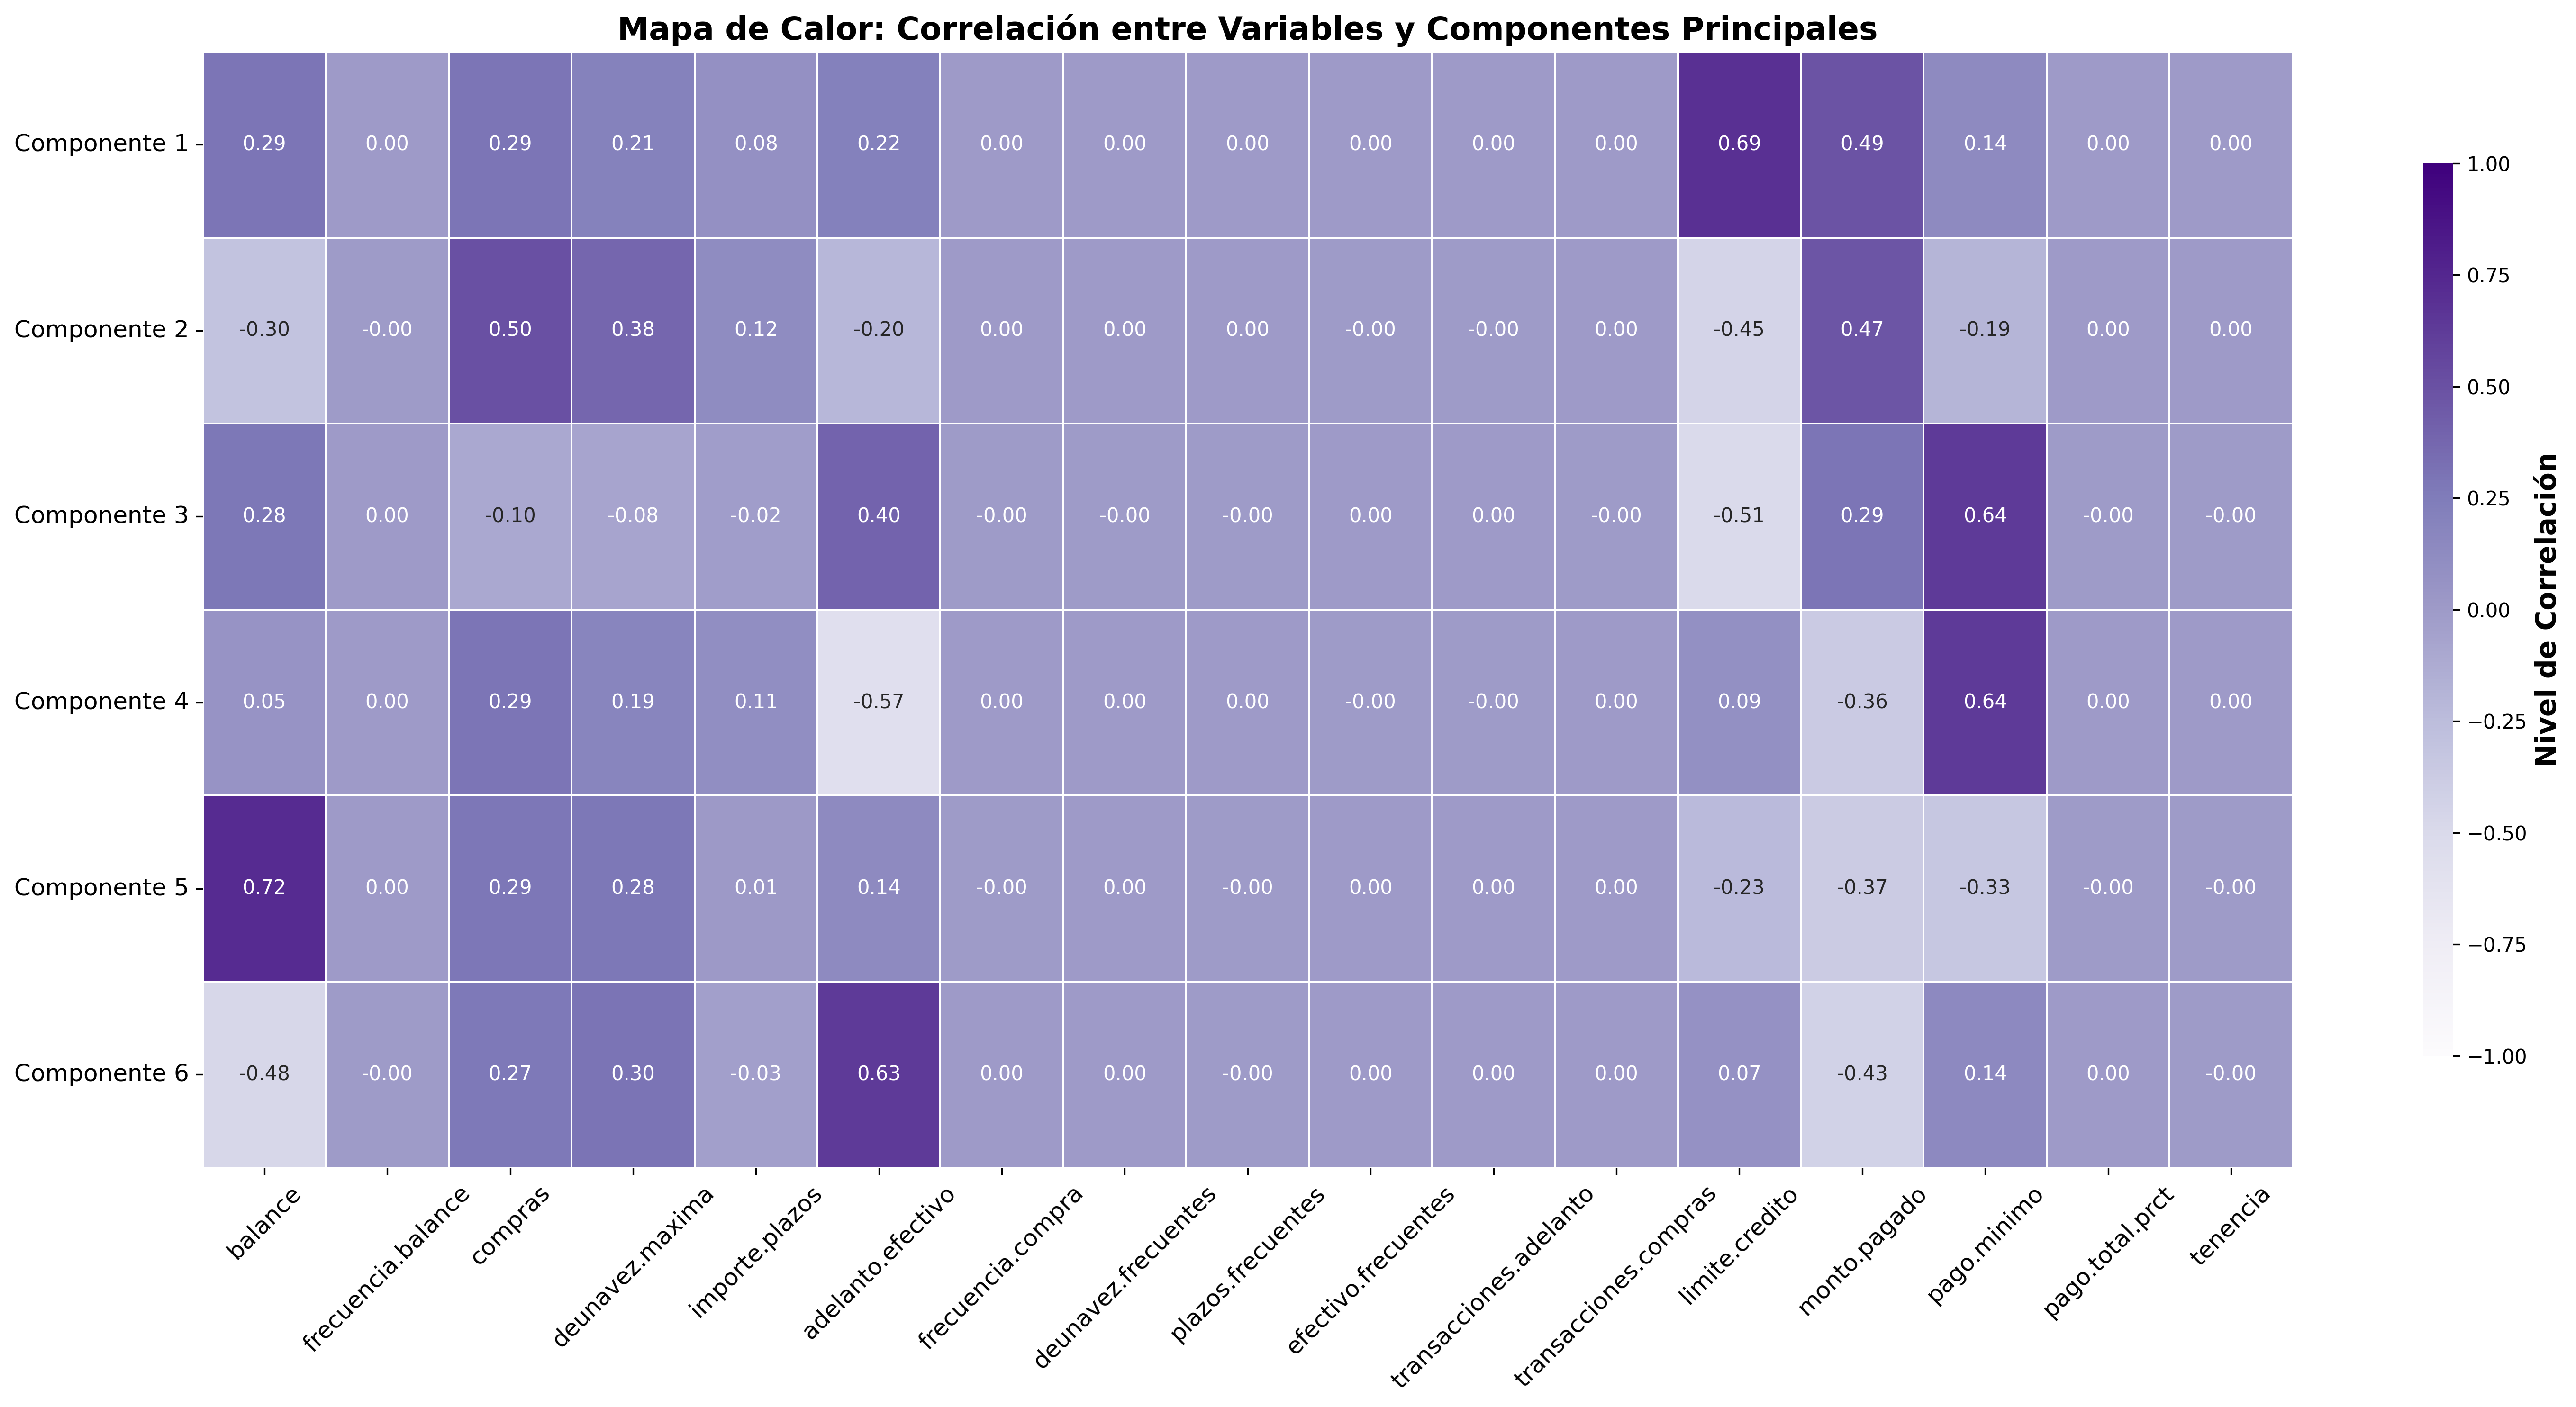

In [11]:
# Hacemos la visualizacion de nuestro mapa de Calor: Ayuda a identificar r√°pidamente qu√© variables contribuyen m√°s a cada componente principal, facilitando la
# interpretaci√≥n de las dimensiones reducidas del PCA.
plt.figure(figsize=(20, 10), dpi=300)
mapa = sns.heatmap(df_pca6componentes,
                   annot=True,
                   cmap="Purples",
                   fmt=".2f",
                   linewidths=0.5,
                   vmin=-1, vmax=1,
                   cbar_kws={"shrink": 0.8, "aspect": 30})
cbar = mapa.collections[0].colorbar
cbar.set_label("Nivel de Correlaci√≥n", fontsize=14, color="black", fontweight="bold")
cbar.ax.yaxis.set_tick_params(color="black")
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="black")
plt.title("Mapa de Calor: Correlaci√≥n entre Variables y Componentes Principales",
          fontsize=16, fontweight='bold', color="black")
plt.xticks(fontsize=12, rotation=45, color="black")
plt.yticks(fontsize=12, rotation=0, color="black")
plt.tight_layout()
plt.show()

üîç **Interpretaci√≥n del Mapa de Calor: Correlaci√≥n entre Variables Originales y Componentes Principales**

El mapa de calor nos permite visualizar la relaci√≥n entre las variables originales del dataset y los seis primeros
componentes principales obtenidos tras aplicar PCA. Cada celda representa el coeficiente de correlaci√≥n entre una
variable y un componente, donde los valores m√°s cercanos a 1 o -1 indican una fuerte relaci√≥n, mientras que valores
cercanos a 0 muestran una baja influencia.

üéØ **Puntos clave en la interpretaci√≥n:**
- **Colores m√°s oscuros (morado intenso)** ‚ûù Indican una alta correlaci√≥n positiva con el componente principal.
- **Colores m√°s claros (dorado claro o blanco)** ‚ûù Representan baja correlaci√≥n o valores cercanos a 0.
- **Valores negativos destacados** ‚ûù Muestran una relaci√≥n inversa con el componente correspondiente.

üìå **Hallazgos en nuestra gr√°fica:**
1. **El Componente 5 tiene una fuerte relaci√≥n con la variable `balance`** (0.72), lo que sugiere que este factor
   est√° altamente influenciado por el saldo de la tarjeta de cr√©dito.
2. **El Componente 6 est√° altamente correlacionado con `adelanto.efectivo`** (0.63), lo que indica que este
   componente captura variaciones relacionadas con los adelantos en efectivo.
3. **El Componente 4 muestra una correlaci√≥n inversa con `importe.plazos` (-0.57)**, lo que implica que este
   factor est√° relacionado con patrones opuestos a los pagos a plazos.
4. **`frecuencia.balance` parece no tener un impacto significativo en ning√∫n componente**, ya que sus correlaciones
   son cercanas a 0 en todas las dimensiones.

‚úÖ **Conclusi√≥n:**  
El PCA nos ha permitido reducir la dimensionalidad del dataset conservando informaci√≥n clave. Este mapa de calor
es fundamental para interpretar qu√© variables originales est√°n aportando m√°s a la nueva estructura de datos y c√≥mo
se pueden agrupar en factores latentes.



In [12]:
# Ahora transofrmaremos nuestra base de 17 variables a 6 variables latentes
scores_pca6 = pca6.transform(df)
print(scores_pca6)

[[-4.32250297e+03  9.12075900e+02  2.11345568e+02 -1.43620714e+02
  -6.10556423e+01 -9.52898755e+00]
 [ 4.12288176e+03 -2.44037939e+03  2.34315136e+03 -3.93220261e+03
  -5.01156080e+01  1.45029925e+03]
 [ 1.50043702e+03 -2.00332309e+03 -2.09766609e+03  1.07052502e+03
   2.98524756e+02 -3.91001623e+02]
 ...
 [-4.37576493e+03  9.01886777e+02  1.29192870e+02 -1.17222345e+02
   4.42837428e+00  5.36286620e+01]
 [-4.78724798e+03  1.02258485e+03  3.85624860e+02 -2.48557539e+02
   9.42818975e+01  1.91533657e+01]
 [-3.62043944e+03  1.54671969e+03 -3.49301757e-01  3.26062749e+02
   8.10650840e+02  5.82022826e+02]]


üìå **Estandarizaci√≥n de Datos antes del Clustering**

Antes de aplicar el algoritmo de agrupamiento K-Means, es fundamental **escalar los datos** para garantizar que todas
las variables contribuyan equitativamente en la formaci√≥n de los cl√∫steres. Esto es especialmente importante en nuestro
caso, ya que los componentes principales (variables latentes) pueden tener diferentes escalas y magnitudes.

‚öôÔ∏è **Proceso de estandarizaci√≥n:**
1. Utilizamos la clase `StandardScaler` de `sklearn.preprocessing`, que transforma los datos para que tengan **media 0 y desviaci√≥n est√°ndar 1**.
2. Ajustamos (`fit`) el `StandardScaler` a nuestros datos latentes obtenidos con PCA.
3. Aplicamos la transformaci√≥n (`transform`) para obtener datos estandarizados, listos para K-Means.

üéØ **¬øPor qu√© es importante este paso?**
- K-Means utiliza la distancia euclidiana para calcular la similitud entre puntos, por lo que **las diferencias en escala podr√≠an sesgar los resultados**.
- La estandarizaci√≥n permite que cada componente tenga la misma influencia en la formaci√≥n de los cl√∫steres.
- Evita que variables con valores m√°s grandes (como `balance`) dominen sobre otras con valores m√°s peque√±os.

‚úÖ **Conclusi√≥n:**  
Al escalar las variables latentes obtenidas con PCA, garantizamos que el proceso de clustering sea m√°s preciso y los grupos formados reflejen patrones significativos en los datos.

In [13]:
#Estandarizamos
estandarizar = StandardScaler()
pca6_std = estandarizar.fit_transform(scores_pca6)
print(pca6_std)

[[-9.45689228e-01  3.26484012e-01  8.51306525e-02 -6.43155735e-02
  -4.20152673e-02 -8.72165078e-03]
 [ 9.02015544e-01 -8.73551046e-01  9.43828660e-01 -1.76090105e+00
  -3.44869136e-02  1.32742367e+00]
 [ 3.28269788e-01 -7.17103652e-01 -8.44946432e-01  4.79397636e-01
   2.05428965e-01 -3.57874285e-01]
 ...
 [-9.57342029e-01  3.22836744e-01  5.20392903e-02 -5.24939765e-02
   3.04737321e-03  4.90850113e-02]
 [-1.04736743e+00  3.66041473e-01  1.55330894e-01 -1.11307904e-01
   6.48798206e-02  1.75306103e-02]
 [-7.92089817e-01  5.53659240e-01 -1.40699835e-04  1.46015934e-01
   5.57847079e-01  5.32711351e-01]]


In [14]:
# Determinando K con el M√©todo del Codo - WCSS
wcss = []
for i in range(1,11):
    kmediaspca6 = KMeans(n_clusters = i, init = "k-means++", random_state = 99)
    kmediaspca6.fit(pca6_std)
    wcss.append(kmediaspca6.inertia_)

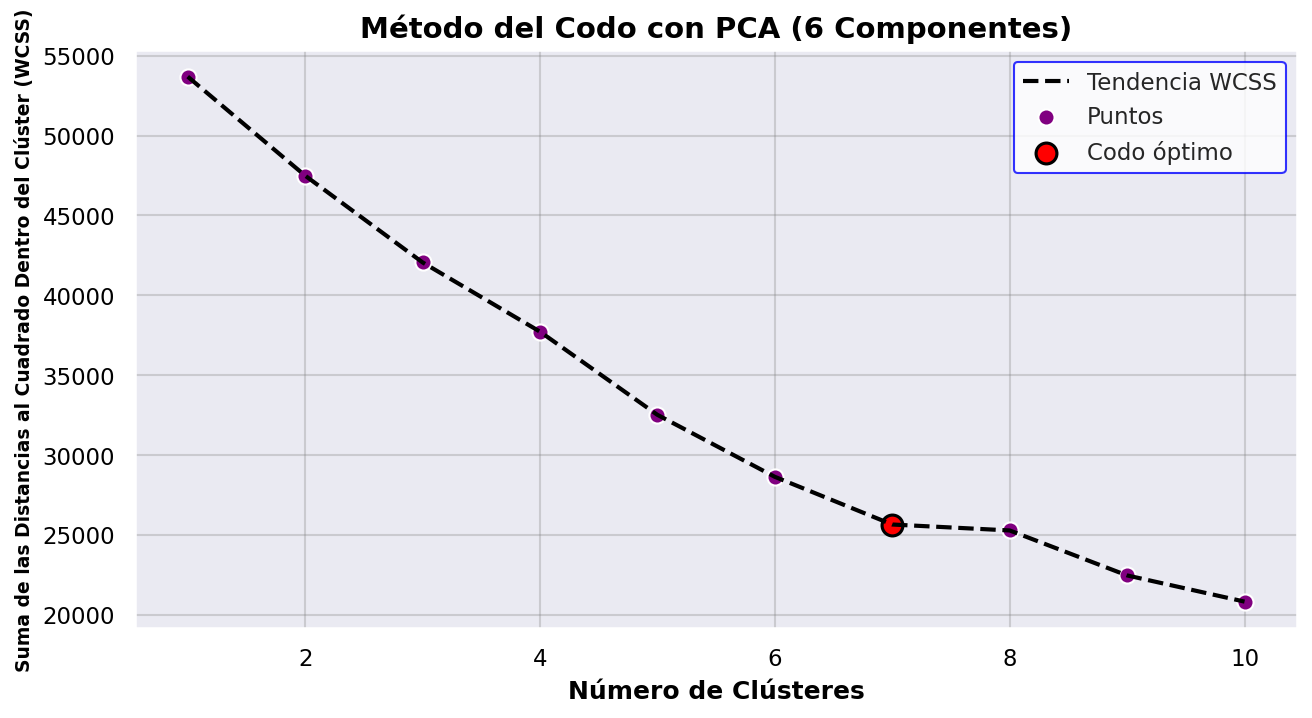

In [15]:
#Visualizacion de nuestra grafica del codo
sns.set(style="darkgrid", rc={"grid.color": "gray", "grid.alpha": 0.3})
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(range(1, 11), wcss, linestyle="--", color="black", linewidth=2, label="Tendencia WCSS")
plt.scatter(range(1, 11), wcss, color="purple", s=60, edgecolor="white", label="Puntos")
best_k = 7
plt.scatter(best_k, wcss[best_k - 1], color="red", s=100, edgecolor="black", linewidth=1.5, label="Codo √≥ptimo")
plt.xlabel("N√∫mero de Cl√∫steres", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Suma de las Distancias al Cuadrado Dentro del Cl√∫ster (WCSS)", fontsize=9, fontweight="bold", color="black")
plt.title("M√©todo del Codo con PCA (6 Componentes)", fontsize=14, fontweight="bold", color="black")
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")
plt.legend(fontsize=11, facecolor="white", edgecolor="blue")
plt.show()

üîπ **Implementaci√≥n de K-Means Clustering**

El n√∫mero √≥ptimo de cl√∫steres se ha determinado como **7** a partir del **M√©todo del Codo**.
Este punto representa un equilibrio entre la **cohesi√≥n interna** de los grupos y la **separaci√≥n entre ellos**.

üìå **¬øPor qu√© k=7?**  
El an√°lisis del gr√°fico muestra que en k=7, la disminuci√≥n de la **Suma de las Distancias al Cuadrado (WCSS)**
se vuelve menos pronunciada. Esto significa que agregar m√°s cl√∫steres no mejorar√° significativamente la segmentaci√≥n,
pero s√≠ podr√≠a aumentar la complejidad del modelo sin una ganancia sustancial.

‚ö° **¬øQu√© lograremos con K-Means?**  
K-Means nos permitir√° **agrupar** los datos en 7 segmentos distintos, donde cada cl√∫ster contiene
observaciones con caracter√≠sticas similares. Esto facilita la interpretaci√≥n de los patrones ocultos en los datos y
puede ser √∫til para estrategias de negocio, an√°lisis de clientes o estudios de comportamiento.

‚úÖ **Conclusi√≥n:**  
Aplicar K-Means con k=7 nos permite obtener una segmentaci√≥n √≥ptima y significativa,
maximizando la utilidad del an√°lisis sin sobreajustar el modelo. üöÄ

In [16]:
#Creacion de nuestra variable y entrenamiento del modelo
cluster_k7_pca6 = KMeans(n_clusters = 7, init = "k-means++", random_state = 99)
cluster_k7_pca6.fit(pca6_std)

KMeans(n_clusters=7, random_state=99)

In [17]:
# Concatenemos un df con las variables originales y las latentes
df_k7_pca6 = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca6)], axis = 1)
df_k7_pca6

balance  frecuencia.balance  compras  deunavez.maxima  \
0       40.900749            0.818182    95.40             0.00   
1     3202.467416            0.909091     0.00             0.00   
2     2495.148862            1.000000   773.17           773.17   
3     1666.670542            0.636364  1499.00          1499.00   
4      817.714335            1.000000    16.00            16.00   
...           ...                 ...      ...              ...   
8945    28.493517            1.000000   291.12             0.00   
8946    19.183215            1.000000   300.00             0.00   
8947    23.398673            0.833333   144.40             0.00   
8948    13.457564            0.833333     0.00             0.00   
8949   372.708075            0.666667  1093.25          1093.25   

      importe.plazos  adelanto.efectivo  frecuencia.compra  \
0              95.40           0.000000           0.166667   
1               0.00        6442.945483           0.000000   
2               0.00           0.000000           1.000000   
3               0.00         205.788017           0.083333   
4               0.00           0.000000           0.083333   
...              ...                ...                ...   
8945          291.12           0.000000           1.000000   
8946          300.00           0.000000           1.000000   
8947          144.40           0.000000           0.833333   
8948            0.00          36.558778           0.000000   
8949            0.00         127.040008           0.666667   

      deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  ...  \
0                0.000000           0.083333             0.000000  ...   
1                0.000000           0.000000             0.250000  ...   
2                1.000000           0.000000             0.000000  ...   
3                0.083333           0.000000             0.083333  ...   
4                0.083333           0.000000             0.000000  ...   
...                   ...                ...                  ...  ...   
8945             0.000000           0.833333             0.000000  ...   
8946             0.000000           0.833333             0.000000  ...   
8947             0.000000           0.666667             0.000000  ...   
8948             0.000000           0.000000             0.166667  ...   
8949             0.666667           0.000000             0.333333  ...   

      monto.pagado  pago.minimo  pago.total.prct  tenencia            0  \
0       201.802084   139.509787         0.000000        12 -4322.502965   
1      4103.032597  1072.340217         0.222222        12  4122.881755   
2       622.066742   627.284787         0.000000        12  1500.437024   
3         0.000000     0.000000         0.000000        12  1279.846965   
4       678.334763   244.791237         0.000000        12 -3739.093063   
...            ...          ...              ...       ...          ...   
8945    325.594462    48.886365         0.500000         6 -4204.883548   
8946    275.861322     0.000000         0.000000         6 -4235.167897   
8947     81.270775    82.418369         0.250000         6 -4375.764932   
8948     52.549959    55.755628         0.250000         6 -4787.247978   
8949     63.165404    88.288956         0.000000         6 -3620.439444   

                1            2            3           4            5  
0      912.075900   211.345568  -143.620714  -61.055642    -9.528988  
1    -2440.379395  2343.151356 -3932.202605  -50.115608  1450.299249  
2    -2003.323087 -2097.666094  1070.525020  298.524756  -391.001623  
3    -1330.413945 -2952.847025  1085.486488  581.994140   725.259494  
4      748.091636   538.547761  -220.143831  221.902588  -566.473886  
...           ...          ...          ...         ...          ...  
8945  1112.855914   163.758991  -167.878712  -27.084979   -23.120095  
8946  1106.984318   114.395238  -177.776138    3.505129    -2.329043  
8947   901.886777   129.192870 

In [18]:
#Agregamos nombres a las variables latentes
df_k7_pca6.columns.values[-6:] = ["ActividadFinanciera", "GestionCompras", "ResponsabilidadPago", "AversionEfectivo", "ConservacionSaldo", "CautelaCrediticia"]
df_k7_pca6

balance  frecuencia.balance  compras  deunavez.maxima  \
0       40.900749            0.818182    95.40             0.00   
1     3202.467416            0.909091     0.00             0.00   
2     2495.148862            1.000000   773.17           773.17   
3     1666.670542            0.636364  1499.00          1499.00   
4      817.714335            1.000000    16.00            16.00   
...           ...                 ...      ...              ...   
8945    28.493517            1.000000   291.12             0.00   
8946    19.183215            1.000000   300.00             0.00   
8947    23.398673            0.833333   144.40             0.00   
8948    13.457564            0.833333     0.00             0.00   
8949   372.708075            0.666667  1093.25          1093.25   

      importe.plazos  adelanto.efectivo  frecuencia.compra  \
0              95.40           0.000000           0.166667   
1               0.00        6442.945483           0.000000   
2               0.00           0.000000           1.000000   
3               0.00         205.788017           0.083333   
4               0.00           0.000000           0.083333   
...              ...                ...                ...   
8945          291.12           0.000000           1.000000   
8946          300.00           0.000000           1.000000   
8947          144.40           0.000000           0.833333   
8948            0.00          36.558778           0.000000   
8949            0.00         127.040008           0.666667   

      deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  ...  \
0                0.000000           0.083333             0.000000  ...   
1                0.000000           0.000000             0.250000  ...   
2                1.000000           0.000000             0.000000  ...   
3                0.083333           0.000000             0.083333  ...   
4                0.083333           0.000000             0.000000  ...   
...                   ...                ...                  ...  ...   
8945             0.000000           0.833333             0.000000  ...   
8946             0.000000           0.833333             0.000000  ...   
8947             0.000000           0.666667             0.000000  ...   
8948             0.000000           0.000000             0.166667  ...   
8949             0.666667           0.000000             0.333333  ...   

      monto.pagado  pago.minimo  pago.total.prct  tenencia  \
0       201.802084   139.509787         0.000000        12   
1      4103.032597  1072.340217         0.222222        12   
2       622.066742   627.284787         0.000000        12   
3         0.000000     0.000000         0.000000        12   
4       678.334763   244.791237         0.000000        12   
...            ...          ...              ...       ...   
8945    325.594462    48.886365         0.500000         6   
8946    275.861322     0.000000         0.000000         6   
8947     81.270775    82.418369         0.250000         6   
8948     52.549959    55.755628         0.250000         6   
8949     63.165404    88.288956         0.000000         6   

      ActividadFinanciera  GestionCompras  ResponsabilidadPago  \
0            -4322.502965      912.075900           211.345568   
1             4122.881755    -2440.379395          2343.151356   
2             1500.437024    -2003.323087         -2097.666094   
3             1279.846965    -1330.413945         -2952.847025   
4            -3739.093063      748.091636           538.547761   
...                   ...             ...                  ...   
8945         -4204.883548     1112.855914           163.758991   
8946         -4235.167897     1106.984318           114.395238   
8947         -4375.764932      901.886777           129.192870   
8948         -4787.247978     1022.584853           385.624860   
8949         -3620.439444     1546.719689            -0.349302   

      AversionEfectivo  Conservac

In [19]:
# Agreguemos la columna con los clusters de cluster_k7_pca6
df_k7_pca6['Clusters7'] = cluster_k7_pca6.labels_
df_k7_pca6

balance  frecuencia.balance  compras  deunavez.maxima  \
0       40.900749            0.818182    95.40             0.00   
1     3202.467416            0.909091     0.00             0.00   
2     2495.148862            1.000000   773.17           773.17   
3     1666.670542            0.636364  1499.00          1499.00   
4      817.714335            1.000000    16.00            16.00   
...           ...                 ...      ...              ...   
8945    28.493517            1.000000   291.12             0.00   
8946    19.183215            1.000000   300.00             0.00   
8947    23.398673            0.833333   144.40             0.00   
8948    13.457564            0.833333     0.00             0.00   
8949   372.708075            0.666667  1093.25          1093.25   

      importe.plazos  adelanto.efectivo  frecuencia.compra  \
0              95.40           0.000000           0.166667   
1               0.00        6442.945483           0.000000   
2               0.00           0.000000           1.000000   
3               0.00         205.788017           0.083333   
4               0.00           0.000000           0.083333   
...              ...                ...                ...   
8945          291.12           0.000000           1.000000   
8946          300.00           0.000000           1.000000   
8947          144.40           0.000000           0.833333   
8948            0.00          36.558778           0.000000   
8949            0.00         127.040008           0.666667   

      deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  ...  \
0                0.000000           0.083333             0.000000  ...   
1                0.000000           0.000000             0.250000  ...   
2                1.000000           0.000000             0.000000  ...   
3                0.083333           0.000000             0.083333  ...   
4                0.083333           0.000000             0.000000  ...   
...                   ...                ...                  ...  ...   
8945             0.000000           0.833333             0.000000  ...   
8946             0.000000           0.833333             0.000000  ...   
8947             0.000000           0.666667             0.000000  ...   
8948             0.000000           0.000000             0.166667  ...   
8949             0.666667           0.000000             0.333333  ...   

      pago.minimo  pago.total.prct  tenencia  ActividadFinanciera  \
0      139.509787         0.000000        12         -4322.502965   
1     1072.340217         0.222222        12          4122.881755   
2      627.284787         0.000000        12          1500.437024   
3        0.000000         0.000000        12          1279.846965   
4      244.791237         0.000000        12         -3739.093063   
...           ...              ...       ...                  ...   
8945    48.886365         0.500000         6         -4204.883548   
8946     0.000000         0.000000         6         -4235.167897   
8947    82.418369         0.250000         6         -4375.764932   
8948    55.755628         0.250000         6         -4787.247978   
8949    88.288956         0.000000         6         -3620.439444   

      GestionCompras  ResponsabilidadPago  AversionEfectivo  \
0         912.075900           211.345568       -143.620714   
1       -2440.379395          2343.151356      -3932.202605   
2       -2003.323087         -2097.666094       1070.525020   
3       -1330.413945         -2952.847025       1085.486488   
4         748.091636           538.547761       -220.143831   
...              ...                  ...               ...   
8945     1112.855914           163.758991       -167.878712   
8946     1106.984318           114.395238       -177.776138   
8947      901.886777           129.192870       -117.222345   
8948     1022.584853           385.624860       -248.557539   
8949     1546.719689            -0.349302        

üîπ **C√°lculo del Promedio de las Variables por Cl√∫ster**  

Una vez aplicamos **K-Means Clustering**, es importante analizar las caracter√≠sticas de cada grupo.  
Para ello, calculamos el **promedio de las variables dentro de cada cl√∫ster**, lo que nos permite entender
c√≥mo se comportan los diferentes segmentos de datos.  

üìå **¬øPor qu√© calcular las medias agrupadas?**  
Cuando agrupamos datos en cl√∫steres, queremos saber qu√© los hace diferentes entre s√≠.  
Al calcular la **media de cada variable por cl√∫ster**, podemos:  

‚úÖ **Identificar patrones** ‚Üí Ver qu√© caracter√≠sticas predominan en cada grupo.  
‚úÖ **Interpretar los segmentos** ‚Üí Comprender el perfil de cada cl√∫ster en base a las variables originales.  
‚úÖ **Tomar decisiones estrat√©gicas** ‚Üí Aplicar estos hallazgos en modelos predictivos, estrategias de negocio o an√°lisis financiero.  

‚ö° **Ejemplo de aplicaci√≥n**  
Si estamos analizando clientes de tarjetas de cr√©dito, las medias agrupadas nos dir√°n si un grupo gasta m√°s,  
paga regularmente o tiene altos niveles de adelantos en efectivo.  

‚úÖ **Conclusi√≥n:**  
Este an√°lisis nos proporciona una **visi√≥n resumida** y f√°cil de interpretar de los grupos encontrados,  
permitiendo una toma de decisiones basada en datos. üöÄ

In [20]:
medias_agrupadas = df_k7_pca6.groupby(["Clusters7"]).mean()
medias_agrupadas

balance  frecuencia.balance       compras  deunavez.maxima  \
Clusters7                                                                   
0          3223.510348            0.789683   1674.414355       828.431774   
1          6061.116710            0.999094   1333.760953       777.280000   
2          4250.150569            0.984849    918.267222       146.178056   
3          3741.429208            0.916089    666.833837       424.824245   
4           681.080773            0.850867   1384.547505       835.393746   
5           894.999920            0.864829    653.856774       345.567159   
6          3511.058726            0.985114  15767.261250     12344.061375   

           importe.plazos  adelanto.efectivo  frecuencia.compra  \
Clusters7                                                         
0              846.100860        3039.541905           0.391464   
1              556.563812        1815.187263           0.462331   
2              772.089167         976.903069           0.499369   
3              242.009592        6923.636494           0.297441   
4              549.672696         270.061330           0.627000   
5              308.597316         492.219724           0.470191   
6             3423.199875         459.487431           0.914375   

           deunavez.frecuentes  plazos.frecuentes  efectivo.frecuentes  ...  \
Clusters7                                                               ...   
0                     0.185138           0.319113             0.217416  ...   
1                     0.250767           0.336518             0.272381  ...   
2                     0.044823           0.468645             0.084596  ...   
3                     0.144726           0.200171             0.458502  ...   
4                     0.346125           0.432756             0.049855  ...   
5                     0.153722           0.359973             0.110853  ...   
6                     0.830549           0.673731             0.044792  ...   

           monto.pagado   pago.minimo  pago.total.prct   tenencia  \
Clusters7                                                           
0          11517.490294   1486.690480         0.169034  11.844086   
1           2043.477603   2136.233251         0.000227  11.856436   
2           1357.092339  27995.061876         0.000000  11.916667   
3           4000.166405   1326.045752         0.049221  10.965306   
4           1671.503290    288.875479         0.296085  11.825896   
5           1030.974113    555.135880         0.141043  11.412398   
6          13907.198274   1841.724327         0.458321  11.950000   

           ActividadFinanciera  GestionCompras  ResponsabilidadPago  \
Clusters7                                                             
0                  9034.984356     2113.048604          2278.088198   
1                  4913.036199    -3277.637278           279.399698   
2                  4199.302785    -6252.934362         18035.424170   
3                  4830.011783    -2373.367921          2597.427486   
4                  2265.072463     -904.918778         -2865.582667   
5                 -2293.741773      681.990697           360.329758   
6                 17972.594638    14443.764386         -1093.639417   

           AversionEfectivo  ConservacionSaldo  CautelaCrediticia  
Clusters7                                                          
0              -3538.455546       -3072.889257       -3009.550336  
1               1023.266305        1967.599771       -1106.900074  
2              17472.549398       -7134.769495        2559.431408  
3              -3653.002640         619.126590        1894.234240  
4                543.478159       -1223.401477         370.999243  
5                -34.226289         116.880045         -49.366064  
6               4059.356486        2606.700360        1598.458522  

[7 rows x 23 columns]

In [21]:
# Hagamos un .iloc para seleccionar las variables que nos interesan (Variables Latentes)
medias_agrupadas.iloc[:, -6:]

ActividadFinanciera  GestionCompras  ResponsabilidadPago  \
Clusters7                                                             
0                  9034.984356     2113.048604          2278.088198   
1                  4913.036199    -3277.637278           279.399698   
2                  4199.302785    -6252.934362         18035.424170   
3                  4830.011783    -2373.367921          2597.427486   
4                  2265.072463     -904.918778         -2865.582667   
5                 -2293.741773      681.990697           360.329758   
6                 17972.594638    14443.764386         -1093.639417   

           AversionEfectivo  ConservacionSaldo  CautelaCrediticia  
Clusters7                                                          
0              -3538.455546       -3072.889257       -3009.550336  
1               1023.266305        1967.599771       -1106.900074  
2              17472.549398       -7134.769495        2559.431408  
3              -3653.002640         619.126590        1894.234240  
4                543.478159       -1223.401477         370.999243  
5                -34.226289         116.880045         -49.366064  
6               4059.356486        2606.700360        1598.458522

üìä **Interpretaci√≥n de los Cl√∫steres en funci√≥n de sus caracter√≠sticas**  

Tras aplicar **K-Means con k=7**, hemos calculado el promedio de las variables dentro de cada cl√∫ster.  
Esto nos ayuda a **identificar el perfil y comportamiento predominante de cada grupo**.  

üîπ **Explicaci√≥n de las Variables**  
- **Actividad Financiera**: Nivel de movimientos financieros generales.  
- **Gesti√≥n de Compras**: Frecuencia e intensidad de compras realizadas.  
- **Responsabilidad de Pago**: Capacidad de cumplir con pagos a tiempo.  
- **Aversi√≥n al Efectivo**: Preferencia por m√©todos digitales en lugar de efectivo.  
- **Conservaci√≥n del Saldo**: Tendencia a mantener dinero en la cuenta sin gastarlo.  
- **Cautela Crediticia**: Uso prudente del cr√©dito, evitando deudas elevadas.  

üìå **An√°lisis de los Cl√∫steres**  

**Cl√∫ster 0** ‚Üí **Alta Actividad Financiera, Bajo Uso de Efectivo**  
   - Clientes con **altos movimientos financieros** y **gastos moderados**.  
   - Prefieren no usar efectivo (**aversi√≥n negativa al efectivo**).  
   - Baja tendencia a conservar saldo y cautela crediticia.  

**Cl√∫ster 1** ‚Üí **Actividad Financiera Moderada con Bajo Gasto**  
   - Movimiento financiero **medio**, pero con **baja gesti√≥n de compras**.  
   - Baja responsabilidad de pago, pero **conservan saldo**.  
   - Son **precavidos con el cr√©dito**.  

**Cl√∫ster 2** ‚Üí **Usuarios de Alto Cr√©dito y Compras Elevadas**  
   - **Alta responsabilidad de pago** y **alta aversi√≥n al efectivo** (usan tarjetas y pagos digitales).  
   - Prefieren **mantenerse al d√≠a con pagos**.  
   - Tienden a no conservar saldo disponible.  

**Cl√∫ster 3** ‚Üí **Clientes con Compras Elevadas y Moderada Actividad Financiera**  
   - Alta actividad financiera con **buen nivel de compras**.  
   - Uso bajo de efectivo, pero **conservan saldo disponible**.  
   - Suelen ser **m√°s confiados en el uso del cr√©dito**.  

**Cl√∫ster 4** ‚Üí **Baja Actividad Financiera y Compras Discretas**  
   - Movimiento financiero **bajo**.  
   - Compras moderadas y **responsabilidad de pago negativa**.  
   - Prefieren **mantener saldo sin muchos movimientos**.  

**Cl√∫ster 5** ‚Üí **Usuarios de Bajo Movimiento Financiero**  
   - **Actividad financiera negativa** (puede ser inactividad o retiro de dinero).  
   - Baja gesti√≥n de compras y baja responsabilidad de pago.  
   - Mantienen saldo estable y son **cautelosos con el cr√©dito**.  

**Cl√∫ster 6** ‚Üí **Clientes con Alta Actividad Financiera y Gesti√≥n de Compras Elevada**  
   - **Movimiento financiero muy alto**.  
   - Compras **elevadas**, pero con baja responsabilidad de pago.  
   - Prefieren **mantener saldo** y mostrar cautela crediticia.  

‚úÖ **Conclusi√≥n:**  
Los datos reflejan **diferentes tipos de comportamiento financiero** entre los clientes.  
Esta informaci√≥n es clave para segmentaci√≥n de mercado, estrategias de cr√©dito y toma de decisiones financieras. üöÄ

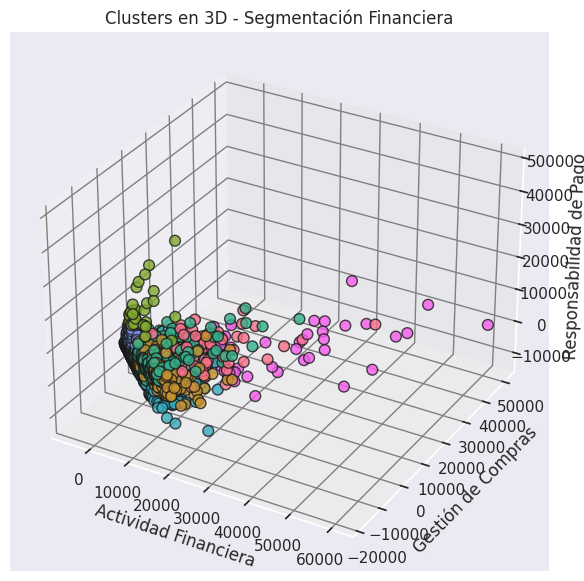

In [30]:
#Visualizacion de los clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
palette = sns.color_palette("husl", len(df_k7_pca6['Clusters7'].unique()))
colors = [palette[i] for i in df_k7_pca6['Clusters7']]
ax.scatter(df_k7_pca6['ActividadFinanciera'],
           df_k7_pca6['GestionCompras'],
           df_k7_pca6['ResponsabilidadPago'],
           c=colors, s=60, alpha=0.8, edgecolors='k')
ax.set_xlabel("Actividad Financiera")
ax.set_ylabel("Gesti√≥n de Compras")
ax.set_zlabel("Responsabilidad de Pago")
ax.set_title("Clusters en 3D - Segmentaci√≥n Financiera")
plt.savefig("grafica_3d.png", dpi=300)
plt.show()


üí≥ **Transformando Datos en Conocimiento**  
En este proyecto, hemos explorado una base de datos de tarjetas de cr√©dito aplicando **An√°lisis de Componentes Principales (PCA)** y **Clustering con K-Means**. A trav√©s de este enfoque, logramos **reducir la dimensionalidad** de nuestros datos sin perder informaci√≥n clave, facilitando la interpretaci√≥n y optimizando el an√°lisis de patrones financieros.  

üìä **PCA: Encontrando la Esencia de los Datos**  
Gracias a PCA, identificamos que **6 componentes principales** explican la mayor parte de la variabilidad de nuestros datos. Esto nos permiti√≥ generar nuevas variables latentes que capturan comportamientos financieros relevantes, como la **actividad financiera, la gesti√≥n de compras y la responsabilidad de pago**.  

üîé **K-Means: Agrupando Perfiles Financieros**  
Al aplicar K-Means con **7 clusters √≥ptimos**, segmentamos a los clientes seg√∫n sus h√°bitos de gasto, niveles de pago y manejo del cr√©dito. Esta segmentaci√≥n no solo ayuda a entender diferentes **perfiles financieros**, sino que tambi√©n puede ser utilizada por instituciones para **tomar mejores decisiones estrat√©gicas**, como personalizar ofertas, optimizar riesgos y mejorar la experiencia del usuario.  

üé® **Visualizaci√≥n y An√°lisis Interpretativo**  
Utilizamos gr√°ficos avanzados, incluyendo la **gr√°fica del codo, mapas de calor y visualizaciones 3D**, lo que nos permiti√≥ **interpretar los resultados de manera intuitiva y visualmente atractiva**.  

üöÄ **Reflexi√≥n Final**  
Este an√°lisis nos demuestra el **poder de la estad√≠stica y la ciencia de datos** en la toma de decisiones financieras. A trav√©s de t√©cnicas como PCA y K-Means, podemos transformar grandes vol√∫menes de datos en **informaci√≥n valiosa y procesable**, contribuyendo a la innovaci√≥n en la industria bancaria y financiera.  

  